# Imports & Installs

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import numpy as np
import pickle
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

In [3]:
import sys
sys.path.append('../')
from useful_functions import coleta_estatisticas, test_t

# Análises preliminares

In [4]:
df = pd.read_csv('../DADOS/MICRODADOS_ENEM_2022.csv', encoding ='ISO-8859-1', sep = ';')
df.head(50)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.0,1056.0,1066.0,1078.0,421.1,546.0,498.8,565.3,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.0,1058.0,1067.0,1077.0,490.7,388.6,357.8,416.0,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A
5,210057850231,2022,5,F,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304557,Rio de Janeiro,33,RJ,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,C,B,B,4,C,A,C,C,A,A,B,B,B,A,B,A,A,C,A,B,D,A,A,B
6,210056305481,2022,4,M,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2611606,Recife,26,PE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,3,B,A,B,D,A,A,B,A,A,A,A,A,A,C,A,A,C,A,A,B
7,210055778089,2022,6,F,1,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304904,São Gonçalo,33,RJ,1,1,1,1,1086.0,1055.0,1065.0,1076.0,398.1,427.3,400.2,404.9,CBCCDBCACACABBDAEACBCBBCBCBABBBBDDCBCCCACACDB,BABACCABCBADEABDDBABDEBABDABABCEDCBBDADECACAC,DACECBAEAABBEAACDCCBAEBEBABCCDCBEEDAABDCADBEB,DBCCABCCBCEEBCECBEBEACAABACBBBCBCBBCAEBACEBBC,1,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.0,100.0,120.0,80.0,100.0,40.0,440.0,E,E,B,B,5,B,A,B,C,B,A,C,B,A,A,B,A,A,C,A,A,E,A,A,B
8,210057252239,2022,8,F,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,

In [5]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.0,1056.0,1066.0,1078.0,421.1,546.0,498.8,565.3,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.0,1058.0,1067.0,1077.0,490.7,388.6,357.8,416.0,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [6]:
df['NU_NOTA_MT'].mean()

542.5032163182825

## Separando o dataset de acordo com a renda

In [7]:
pobres_df = df.loc[(df['Q006'] < 'F') ]

In [8]:
nao_ricos_df = df.loc[(df['Q006'] >= 'F') & (df['Q006'] < 'M') ]

In [9]:
ricos_df = df.loc[df['Q006'] >= 'M']

In [10]:
ricos_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
568,210055605314,2022,3,M,1,1,1,2,0,3,1.0,0,3304557.0,Rio de Janeiro,33.0,RJ,4.0,1.0,1.0,3304557,Rio de Janeiro,33,RJ,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,G,D,D,8,Q,D,E,E,D,A,E,B,B,A,B,A,A,E,B,B,E,B,A,B
578,210057333805,2022,2,M,1,1,1,2,0,3,1.0,0,4215802.0,São Bento do Sul,42.0,SC,4.0,1.0,1.0,4215802,São Bento do Sul,42,SC,1,1,1,1,1086.0,1055.0,1065.0,1076.0,497.0,494.5,476.0,548.6,DBDDCECACCCDEBCBDCBCBDCAACBBBDAEDCACBDCCEBCEC,ACACCDDBEDAABBBEBACEDDDBAADBCEADCBBCCDAEBCADE,DDBBAECBAACBADEAAAACAECACCCBCDBCAEECADADACBCD,CDEC*CDEEEACEDCBCDCBDABC*BBDBCACCDCAEDCAEEBDD,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.0,120.0,160.0,120.0,160.0,80.0,640.0,G,G,E,E,4,Q,B,E,D,C,A,C,C,C,B,B,A,B,E,B,B,E,A,E,B
581,210055906649,2022,3,M,1,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3505401,Barra do Turvo,35,SP,1,1,1,1,1085.0,1057.0,1068.0,1075.0,468.4,497.3,452.6,405.6,EACDCECBADCECDADEACDEBADBAEBCAEDABDDADCBDEECE,ACACDDDBDBEAACECBAABDACAEBDBECAEABDDACDDEBEAC,BAECABCBDCAADECEBABADBBCBCCDBDADAADEBEADBAECD,CBDBECDAECCDBABCAEDBDBEACDBEBAAECDEBCBDCAECAB,0,ADBADABEABCEEEACCBDDADDCBBCCAEBAEBEBEACCCDDDE,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,BDECDAADCECCCDCCEBACBBAAAEECABABEECEBEEDCADBDB...,ECDABEBDCEECDBDCCCCBCXCBAACDBAAACEBABDDEDAEBE,1.0,100.0,180.0,120.0,120.0,100.0,620.0,G,F,E,D,3,P,B,D,D,B,A,C,C,B,A,B,A,B,E,A,A,D,B,A,B
633,210057470881,2022,2,F,1,1,1,2,0,2,1.0,0,4321436.0,Terra de Areia,43.0,RS,2.0,1.0,1.0,4304630,Capão da Canoa,43,RS,1,1,1,1,1087.0,1056.0,1066.0,1078.0,401.1,414.6,502.0,536.8,ABEACADCBECBCABBCDDBEABEBEDABCDBECCDDBCBABAEA,BADBCCAECDCAEDBD.CAEBBDDCAEDACEEBDBACCBDAABEC,AEDDBDABCABCEDCDBBDEECEBDEDBBCBCBACCBBCEAECBD,DDEDADBBDCCDEBEDEEBBDBBECADBCEEDADCCBAABEECBA,0,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,180.0,140.0,120.0,80.0,660.0,E,F,D,B,4,O,A,C,D,B,A,D,E,C,B,B,A,B,D,A,B,E,A,B,B


## Análises das notas de matemática

#### Médias

In [11]:
ricos_df['NU_NOTA_MT'].mean()

651.3027707168276

In [12]:
nao_ricos_df['NU_NOTA_MT'].mean()

592.5527033383543

In [13]:
pobres_df['NU_NOTA_MT'].mean()

512.5297964128087

#### Medianas

In [14]:
stats.median(ricos_df['NU_NOTA_MT'])

875.35

In [15]:
stats.median(nao_ricos_df['NU_NOTA_MT'])

391.0

In [16]:
stats.median(pobres_df['NU_NOTA_MT'])

nan

In [17]:
pobres_df['NU_NOTA_MT']

0            NaN
2          565.3
3          416.0
4            NaN
5            NaN
           ...  
3476098    597.4
3476099    432.0
3476101      NaN
3476103      NaN
3476104      NaN
Name: NU_NOTA_MT, Length: 2502592, dtype: float64

In [18]:
ricos_df['NU_NOTA_MT'].describe()

count    169162.000000
mean        651.302771
std         122.819334
min           0.000000
25%         571.600000
50%         657.200000
75%         735.700000
max         985.700000
Name: NU_NOTA_MT, dtype: float64

In [19]:
nao_ricos_df['NU_NOTA_MT'].describe()

count    588883.000000
mean        592.552703
std         116.282107
min           0.000000
25%         505.500000
50%         595.200000
75%         671.500000
max         985.700000
Name: NU_NOTA_MT, dtype: float64

In [20]:
# Set float format to fixed-point with 6 decimal places
pd.set_option('display.float_format', '{:.6f}'.format)

In [21]:
pobres_df['NU_NOTA_MT'].describe()

count   1597350.000000
mean        512.529796
std         100.953498
min           0.000000
25%         432.300000
50%         498.800000
75%         582.400000
max         985.700000
Name: NU_NOTA_MT, dtype: float64

In [22]:
# sns.histplot(data=pobres_df, x='NU_NOTA_MT', bins=30, kde=True, color='skyblue')
# plt.title('Distribuição da NU_NOTA_MT')
# plt.xlabel('Nota de Matemática')
# plt.ylabel('Frequência')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [23]:
# print(axes)

#### Gráficos de distribuição da nota de acordo com nível socioeconômico

Text(0.5, 1.0, 'Histograma 3')

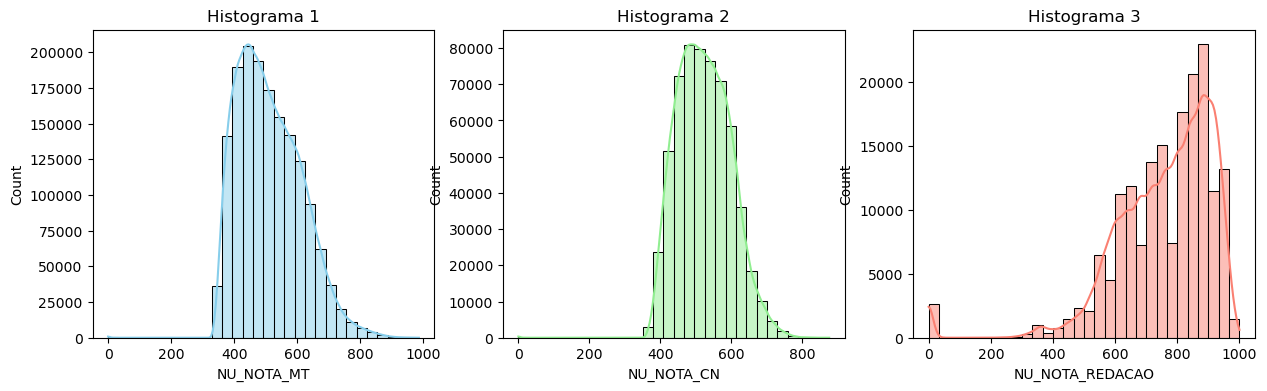

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.histplot(pobres_df['NU_NOTA_MT'].dropna(), bins=30, color='skyblue', kde=True, ax=axes[0])
axes[0].set_title('Histograma 1')
sns.histplot(nao_ricos_df['NU_NOTA_CN'].dropna(), bins=30, color='lightgreen', kde=True, ax=axes[1])
axes[1].set_title('Histograma 2')

sns.histplot(ricos_df['NU_NOTA_REDACAO'].dropna(), bins=30, color='salmon', kde=True, ax=axes[2])
axes[2].set_title('Histograma 3')


#### Análise de acordo com a cor

In [25]:
pretos_pobres_df = pobres_df.loc[(pobres_df['TP_COR_RACA'] == 2) | (pobres_df['TP_COR_RACA'] == 3) ]
nao_pretos_pobres_df = pobres_df.loc[~pobres_df['TP_COR_RACA'].isin([2, 3])]

In [26]:
pretos_nao_ricos_df = nao_ricos_df.loc[(nao_ricos_df['TP_COR_RACA'] == 2) | (nao_ricos_df['TP_COR_RACA'] == 3) ]
nao_pretos_nao_ricos_df = nao_ricos_df.loc[~nao_ricos_df['TP_COR_RACA'].isin([2, 3])]

In [27]:
pretos_ricos_df = ricos_df.loc[(ricos_df['TP_COR_RACA'] == 2) | (ricos_df['TP_COR_RACA'] == 3) ]
nao_pretos_ricos_df = ricos_df.loc[~ricos_df['TP_COR_RACA'].isin([2, 3])]

In [28]:
pretos_pobres_df.shape[0] / pobres_df.shape[0]

0.6280680190778201

In [29]:
pretos_nao_ricos_df.shape[0] / nao_ricos_df.shape[0]

0.36970914074943195

In [30]:
pretos_ricos_df.shape[0] / ricos_df.shape[0]

0.20421790930053804

##### Análise dos pretos pobres vs pobres não pretos

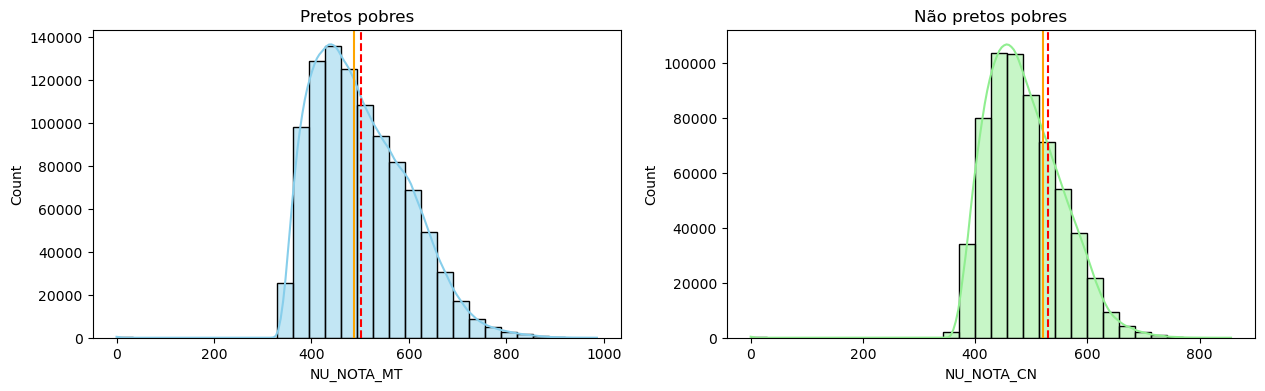

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(pretos_pobres_df['NU_NOTA_MT'].dropna(), bins=30, color='skyblue', kde=True, ax=axes[0])
axes[0].set_title('Pretos pobres')
sns.histplot(nao_pretos_pobres_df['NU_NOTA_CN'].dropna(), bins=30, color='lightgreen', kde=True, ax=axes[1])
axes[1].set_title('Não pretos pobres')

axes[0].axvline(pretos_pobres_df['NU_NOTA_MT'].mean(), color='red', linestyle='--', label=f'Mean: {pretos_pobres_df['NU_NOTA_MT'].mean():.2f}')
axes[0].axvline(pretos_pobres_df['NU_NOTA_MT'].median(), color='orange', linestyle='-', label=f'Median: {pretos_pobres_df['NU_NOTA_MT'].median():.2f}')


axes[1].axvline(nao_pretos_pobres_df['NU_NOTA_MT'].mean(), color='red', linestyle='--', label=f'Mean: {nao_pretos_pobres_df['NU_NOTA_MT'].mean():.2f}')
axes[1].axvline(nao_pretos_pobres_df['NU_NOTA_MT'].median(), color='orange', linestyle='-', label=f'Median: {nao_pretos_pobres_df['NU_NOTA_MT'].median():.2f}')

In [32]:
pretos_pobres_df['NU_NOTA_MT'].describe()

count   983285.000000
mean       501.400628
std         96.111971
min          0.000000
25%        425.400000
50%        486.700000
75%        566.700000
max        985.700000
Name: NU_NOTA_MT, dtype: float64

In [33]:
nao_pretos_pobres_df['NU_NOTA_MT'].describe()

count   614065.000000
mean       530.350621
std        105.846506
min          0.000000
25%        445.900000
50%        520.500000
75%        604.600000
max        985.700000
Name: NU_NOTA_MT, dtype: float64

##### Análise dos pretos não ricos vs não ricos não pretos

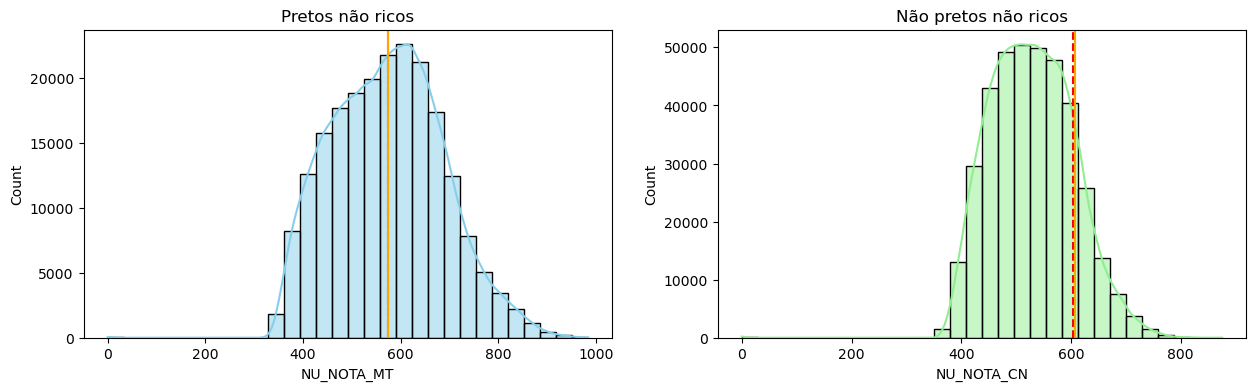

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(pretos_nao_ricos_df['NU_NOTA_MT'].dropna(), bins=30, color='skyblue', kde=True, ax=axes[0])
axes[0].set_title('Pretos não ricos')
sns.histplot(nao_pretos_nao_ricos_df['NU_NOTA_CN'].dropna(), bins=30, color='lightgreen', kde=True, ax=axes[1])
axes[1].set_title('Não pretos não ricos')


axes[0].axvline(pretos_nao_ricos_df['NU_NOTA_MT'].mean(), color='red', linestyle='--', label=f'Mean: {pretos_nao_ricos_df['NU_NOTA_MT'].mean():.2f}')
axes[0].axvline(pretos_nao_ricos_df['NU_NOTA_MT'].median(), color='orange', linestyle='-', label=f'Median: {pretos_nao_ricos_df['NU_NOTA_MT'].median():.2f}')


axes[1].axvline(nao_pretos_nao_ricos_df['NU_NOTA_MT'].mean(), color='red', linestyle='--', label=f'Mean: {nao_pretos_nao_ricos_df['NU_NOTA_MT'].mean():.2f}')
axes[1].axvline(nao_pretos_nao_ricos_df['NU_NOTA_MT'].median(), color='orange', linestyle='-', label=f'Median: {nao_pretos_nao_ricos_df['NU_NOTA_MT'].median():.2f}')

In [35]:
pretos_nao_ricos_df['NU_NOTA_MT'].describe()

count   210863.000000
mean       573.454931
std        113.473260
min          0.000000
25%        485.800000
50%        573.700000
75%        652.000000
max        983.900000
Name: NU_NOTA_MT, dtype: float64

In [36]:
nao_pretos_nao_ricos_df['NU_NOTA_MT'].describe()

count   378020.000000
mean       603.205615
std        116.467215
min          0.000000
25%        518.500000
50%        606.850000
75%        681.400000
max        985.700000
Name: NU_NOTA_MT, dtype: float64

##### Análise dos pretos ricos vs ricos não pretos

Text(0.5, 1.0, 'Não pretos não ricos')

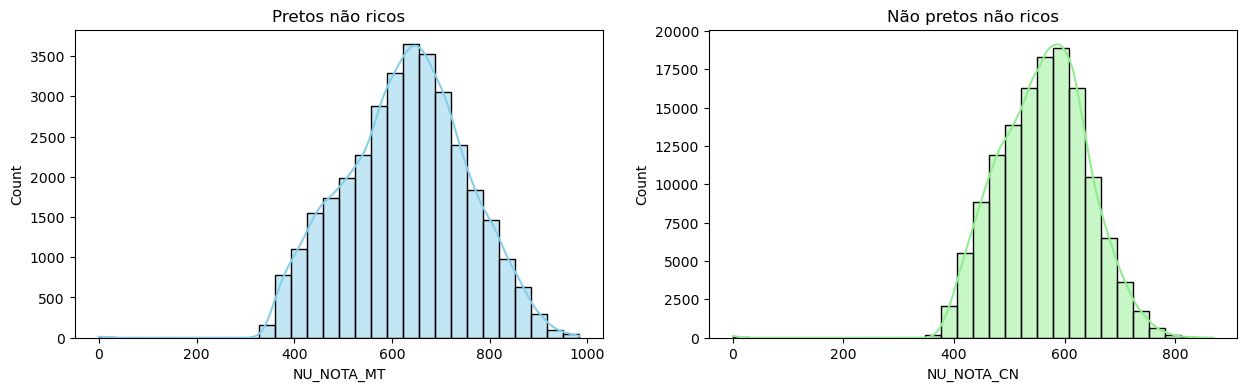

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(pretos_ricos_df['NU_NOTA_MT'].dropna(), bins=30, color='skyblue', kde=True, ax=axes[0])
axes[0].set_title('Pretos não ricos')
sns.histplot(nao_pretos_ricos_df['NU_NOTA_CN'].dropna(), bins=30, color='lightgreen', kde=True, ax=axes[1])
axes[1].set_title('Não pretos não ricos')

In [38]:
pretos_ricos_df['NU_NOTA_MT'].describe()

count   33744.000000
mean      627.587180
std       124.071405
min         0.000000
25%       540.700000
50%       632.600000
75%       713.325000
max       983.200000
Name: NU_NOTA_MT, dtype: float64

In [39]:
nao_pretos_ricos_df['NU_NOTA_MT'].describe()

count   135418.000000
mean       657.212317
std        121.789165
min          0.000000
25%        579.400000
50%        662.900000
75%        740.700000
max        985.700000
Name: NU_NOTA_MT, dtype: float64

#### Análise de acordo com o tipo de escola

In [40]:
publica_ricos_df = ricos_df.loc[ricos_df['TP_ESCOLA'] == 2]

In [41]:
privada_ricos_df = ricos_df.loc[ricos_df['TP_ESCOLA'] == 3]

In [42]:
publica_ricos_df['NU_NOTA_MT'].describe()

count   13360.000000
mean      616.294334
std       121.300710
min         0.000000
25%       529.100000
50%       622.150000
75%       700.400000
max       981.700000
Name: NU_NOTA_MT, dtype: float64

In [43]:
privada_ricos_df['NU_NOTA_MT'].describe()

count   54477.000000
mean      662.619298
std       118.906693
min         0.000000
25%       588.200000
50%       668.900000
75%       744.300000
max       985.700000
Name: NU_NOTA_MT, dtype: float64

Surge o questionamento para essa diferença tão gritante. 

In [44]:
publica_ricos_df['Q006'].describe()

count     16199
unique        5
top           M
freq       5693
Name: Q006, dtype: object

In [45]:
publica_ricos_df['Q006'].value_counts()

Q006
M    5693
N    3483
O    3073
P    2041
Q    1909
Name: count, dtype: int64

In [46]:
privada_ricos_df['Q006'].describe()

count     59483
unique        5
top           Q
freq      17187
Name: Q006, dtype: object

In [47]:
privada_ricos_df['Q006'].value_counts()

Q006
Q    17187
M    11734
P    10955
O    10802
N     8805
Name: count, dtype: int64

Analisando por categoria, temos

In [48]:
publica_M = publica_ricos_df.loc[publica_ricos_df['Q006'] == 'M']

In [49]:
publica_M['NU_NOTA_MT'].describe()

count   4701.000000
mean     605.386705
std      117.243172
min        0.000000
25%      520.700000
50%      612.100000
75%      687.200000
max      981.700000
Name: NU_NOTA_MT, dtype: float64

In [50]:
privada_M = privada_ricos_df.loc[privada_ricos_df['Q006'] == 'M']

In [51]:
privada_M['NU_NOTA_MT'].describe()

count   10878.000000
mean      640.849163
std       115.723201
min       338.000000
25%       565.925000
50%       647.600000
75%       718.975000
max       983.200000
Name: NU_NOTA_MT, dtype: float64

In [52]:
categorias = ['M', 'N', 'O', 'P', 'Q']

for categoria in categorias:
    print(f"Mediana da categoria {categoria} em escolas públicas")
    print(publica_ricos_df.loc[publica_ricos_df['Q006'] == categoria]['NU_NOTA_MT'].describe()['50%'])

Mediana da categoria M em escolas públicas
612.1
Mediana da categoria N em escolas públicas
618.3
Mediana da categoria O em escolas públicas
629.9
Mediana da categoria P em escolas públicas
637.8
Mediana da categoria Q em escolas públicas
629.4


In [53]:
for categoria in categorias:
    print(f"Mediana da categoria {categoria} em escolas privadas")
    print(privada_ricos_df.loc[privada_ricos_df['Q006'] == categoria]['NU_NOTA_MT'].describe()['50%'])

Mediana da categoria M em escolas privadas
647.6
Mediana da categoria N em escolas privadas
653.6
Mediana da categoria O em escolas privadas
666.2
Mediana da categoria P em escolas privadas
674.7
Mediana da categoria Q em escolas privadas
691.7


Será que esse padrão se repete para todas as categorias?

In [54]:
chr(65)

'A'

In [55]:
mediana_pretos = {}

mediana_nao_pretos = {}

for categoria in range(65,82):
    # print(f"Mediana da categoria {chr(categoria)} em escolas públicas, para pessoas pretas")
    # print(df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%'])
    value = df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%']
    mediana_pretos[chr(categoria)] = value
        



for categoria in range(65,82):
    # print(f"Mediana da categoria {chr(categoria)} em escolas públicas, para pessoas não pretas")
    # print(df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%'])
    value = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%']
    mediana_nao_pretos[chr(categoria)] = value

In [56]:
mediana_pretos

{'A': 451.4,
 'B': 470.8,
 'C': 501.2,
 'D': 518.6,
 'E': 534.9,
 'F': 552.5,
 'G': 562.8499999999999,
 'H': 578.8,
 'I': 594.0,
 'J': 599.2,
 'K': 605.8,
 'L': 611.6500000000001,
 'M': 619.4,
 'N': 627.45,
 'O': 636.3,
 'P': 644.5,
 'Q': 653.05}

In [57]:
mediana_nao_pretos

{'A': 467.5,
 'B': 490.1,
 'C': 525.4,
 'D': 544.8,
 'E': 564.6,
 'F': 581.5,
 'G': 592.1,
 'H': 606.7,
 'I': 621.0,
 'J': 629.3,
 'K': 636.8,
 'L': 639.9,
 'M': 645.5,
 'N': 653.1,
 'O': 660.9,
 'P': 669.8,
 'Q': 680.9}

In [58]:
diferenca_medianas = {}

for key in mediana_pretos.keys():
    diferenca_medianas[key] = mediana_nao_pretos[key] - mediana_pretos[key]

In [59]:
diferenca_medianas

{'A': 16.100000000000023,
 'B': 19.30000000000001,
 'C': 24.19999999999999,
 'D': 26.199999999999932,
 'E': 29.700000000000045,
 'F': 29.0,
 'G': 29.250000000000114,
 'H': 27.90000000000009,
 'I': 27.0,
 'J': 30.09999999999991,
 'K': 31.0,
 'L': 28.249999999999886,
 'M': 26.100000000000023,
 'N': 25.649999999999977,
 'O': 24.600000000000023,
 'P': 25.299999999999955,
 'Q': 27.850000000000023}

In [60]:
sum(list(diferenca_medianas.values())) / len(list(diferenca_medianas.values()))

26.323529411764707

##### Analisando as médias

In [61]:
df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()

count   5478.000000
mean     646.617068
std      130.478855
min        0.000000
25%      557.600000
50%      653.050000
75%      738.175000
max      977.000000
Name: NU_NOTA_MT, dtype: float64

In [62]:
media_pretos = {}

media_nao_pretos = {}

values = []
i = 0
for categoria in range(65,82):
    # print(f"Mediana da categoria {chr(categoria)} em escolas públicas, para pessoas pretas")
    # print(df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%'])
    media = df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['mean']
    mediana = df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%']
    std = df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['std']
    n = df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].shape[0]
    
    values.append(media)
    values.append(mediana)
    values.append(std)
    values.append(n)

    media_pretos[chr(categoria)] = values
    values = []


for categoria in range(65,82):
    # print(f"Mediana da categoria {chr(categoria)} em escolas públicas, para pessoas não pretas")
    # print(df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%'])
    value = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['mean']
    media = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['mean']
    mediana = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%']
    std = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['std']
    n = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].shape[0]
    
    values.append(media)
    values.append(mediana)
    values.append(std)
    values.append(n)
    
    media_nao_pretos[chr(categoria)] = values
    values = []

In [63]:
media_nao_pretos

{'A': [487.1359115859923, 467.5, 96.37198313626277, 57199],
 'B': [504.93858132110483, 490.1, 97.92444766971155, 307180],
 'C': [533.3490044159505, 525.4, 103.47026506080816, 231334],
 'D': [548.6731403822357, 544.8, 106.4354162371621, 190606],
 'E': [564.570988762104, 564.6, 109.46501878504695, 144475],
 'F': [579.6345113600764, 581.5, 111.38686250148855, 89732],
 'G': [588.9823033044183, 592.1, 113.00406959781091, 115898],
 'H': [602.8320508113666, 606.7, 114.88304128363194, 120928],
 'I': [616.7056422710554, 621.0, 117.52322426134492, 52781],
 'J': [625.0359101356382, 629.3, 117.83998909788139, 37858],
 'K': [631.9847489233229, 636.8, 118.99095052659317, 27518],
 'L': [635.0252270010017, 639.9, 119.44945565275037, 37680],
 'M': [640.6044841537424, 645.5, 120.13553393631946, 36079],
 'N': [648.5674790069368, 653.1, 120.8350264291665, 26491],
 'O': [655.581280169538, 660.9, 120.65287092557716, 30749],
 'P': [663.6741346035395, 669.8, 120.89840078407306, 29596],
 'Q': [673.859670116429

In [64]:
media_pretos

{'A': [467.0882180996635, 451.4, 81.49160433560732, 147276],
 'B': [486.1806565192721, 470.8, 89.46763821968084, 715689],
 'C': [512.3259061229853, 501.2, 96.71744089971952, 352944],
 'D': [526.5934263382219, 518.6, 100.57139977213332, 223660],
 'E': [539.990206479956, 534.9, 104.41453591424361, 132229],
 'F': [554.7163050854429, 552.5, 107.29495676219217, 68359],
 'G': [563.8745272196343, 562.8499999999999, 110.35022365982174, 78421],
 'H': [576.9932230210205, 578.8, 113.157899906254, 67823],
 'I': [589.6846982652103, 594.0, 116.45748444052576, 26135],
 'J': [596.82049684835, 599.2, 117.17777000375034, 17126],
 'K': [602.4649879041127, 605.8, 119.52930577101415, 11479],
 'L': [608.4038590917586, 611.6500000000001, 119.73608271071846, 13615],
 'M': [614.063712696004, 619.4, 120.64020137731623, 12451],
 'N': [622.1522412755717, 627.45, 121.27756840138633, 8333],
 'O': [630.1937234042553, 636.3, 122.92966517296568, 8285],
 'P': [636.9825150397826, 644.5, 125.12427874293799, 6436],
 'Q': 

Aplicando um teste t para saber se as diferenças são estatísticamente significantes

In [65]:
from scipy.stats import t


In [66]:
# diferenca_medias = {}

# for key in mediana_pretos.keys():
#     diferenca_medias[key] = media_nao_pretos[key] - media_pretos[key]

In [67]:
# diferenca_medias

#### Considerando agora tambéma diferença entre escolas

In [68]:
# media_pretos_publica = {}

# media_nao_pretos_publica = {}


# media_pretos_privada = {}

# media_nao_pretos_privada = {}

# values = []
# i = 0

# # Media_pretos_publica
# query =  df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3])) & (df['TP_ESCOLA'] == 2)]
# describe = query['NU_NOTA_MT'].describe()


# for categoria in range(65,82):
#     # print(f"Mediana da categoria {chr(categoria)} em escolas públicas, para pessoas pretas")
#     # print(df.loc[ (df['Q006'] == chr(categoria) ) & (df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%'])
#     media = describe['mean']
#     mediana = describe['50%']
#     std = describe['std']
#     n = query['NU_NOTA_MT'].shape[0]
    
#     values.append(media)
#     values.append(mediana)
#     values.append(std)
#     values.append(n)

#     media_pretos_publica[chr(categoria)] = values
#     values = []


# #---------------------------------------------------------------------------------------------------------------------------------

# for categoria in range(65,82):
#     # print(f"Mediana da categoria {chr(categoria)} em escolas públicas, para pessoas não pretas")
#     # print(df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%'])
#     value = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['mean']
#     media = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['mean']
#     mediana = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['50%']
#     std = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].describe()['std']
#     n = df.loc[ (df['Q006'] == chr(categoria) ) & (~df['TP_COR_RACA'].isin([2, 3]))]['NU_NOTA_MT'].shape[0]
    
#     values.append(media)
#     values.append(mediana)
#     values.append(std)
#     values.append(n)
    
#     media_nao_pretos[chr(categoria)] = values
#     values = []

In [69]:
# def coleta_estatisticas(query):
#     dic = {}
#     values = []
#     describe = query['NU_NOTA_MT'].describe()


    
#     media = describe['mean'].round(2)
#     mediana = describe['50%'].round(2)
#     std = describe['std'].round(2)
#     n = query['NU_NOTA_MT'].shape[0]
    
#     values.append(media)
#     values.append(mediana)
#     values.append(std)
#     values.append(n)

#     dic[query.loc[0, 'Q006']] = values

#     return dic    

In [70]:
# Media_pretos_publica faixa F
query =  df.loc[ (df['Q006'] == 'F' ) & (df['TP_COR_RACA'].isin([2, 3])) & (df['TP_ESCOLA'] == 2)].copy().reset_index()

media_pretos_publica = coleta_estatisticas(query)

In [71]:
media_pretos_publica

{'F': [539.29, 535.35, 99.88, 21007]}

In [72]:
# Média pretos privada faixa F
query =  df.loc[ (df['Q006'] == 'F' ) & 
        (~df['TP_COR_RACA'].isin([2, 3])) & 
        (df['TP_ESCOLA'] == 2)].copy().reset_index()

media_brancos_publica = coleta_estatisticas(query)


In [73]:
media_brancos_publica

{'F': [559.38, 559.7, 102.72, 26974]}

In [74]:
# def test_t(estatisticas1, estatisticas2, faixa):

#     faixa = list(estatisticas1.keys())[0]

    
#     mean1 = estatisticas1[faixa][0]
#     mean2 = estatisticas2[faixa][0]
    
#     std1 = estatisticas1[faixa][2]
#     std2 = estatisticas2[faixa][2]
    
#     n1 = estatisticas1[faixa][3]
    
#     n2 = estatisticas2[faixa][3]
    
#     se = np.sqrt((std1**2)/n1 + (std2**2)/n2)
#     t_stat = (mean1 - mean2) / se
    
    
#     ndf = ( (std1**2 / n1 + std2**2 / n2)**2 ) / (
#         ((std1**2 / n1)**2 / (n1 - 1)) + ((std2**2 / n2)**2 / (n2 - 1))
#     )
    
#     # Two-tailed p-value
#     p_value = 2 * t.sf(np.abs(t_stat), ndf)
    
#     print(f"T-statistic: {t_stat:.4f}")
#     print(f"P-value: {p_value:.4f}")

#     if p_value < 0.05:
#         print(f"A diferença de {abs(mean1 - mean2).round(3)} É estatísticamente significante!")
#     else:
#         print(f"A diferença de {abs(mean1 - mean2).round(3)} é NÃO estatísticamente significante!")

In [75]:
test_t(media_pretos_publica, media_brancos_publica, 'Q')

T-statistic: -21.5877
P-value: 0.0000
A diferença de 20.09 É estatísticamente significante!


In [76]:
list(media_brancos_publica.keys())

['F']

In [77]:
dic = pd.read_excel('../DICIONÁRIO/Dicionário_Microdados_Enem_2022.xlsx')
dic.drop(columns=['Unnamed: 4', 'Unnamed: 5'], inplace=True)
dic.columns = ['NOME DA VARIÁVEL', 'DESCRICAO', 'CATEGORIA', 'VALOR']

dic.head(76)

,NOME DA VARIÁVEL,DESCRICAO,CATEGORIA,VALOR
0,NaN,NaN,NaN,NaN
1,NOME DA VARIÁVEL,Descrição,Variáveis Categóricas,NaN
2,NaN,NaN,Categoria,Descrição
3,DADOS DO PARTICIPANTE,NaN,NaN,NaN
4,NU_INSCRICAO,Número de inscrição1,NaN,NaN
...,...,...,...,...
71,IN_TREINEIRO,Indica se o inscrito fez a prova com intuito d...,1,Sim
72,NaN,NaN,0,Não
73,DADOS DA ESCOLA,NaN,NaN,NaN
74,CO_MUNICIPIO_ESC\n,Código do município da escola,NaN,NaN


Ideia: lista de dicionários

##### Diferenciando ainda mais de acordo com a cor.

In [78]:
query.loc[0, 'Q006']  

'F'

In [79]:
query = df.loc[ (df['Q006'] == 'F' ) & (df['TP_COR_RACA'].isin([2])) & (df['TP_ESCOLA'] == 2)].copy().reset_index()

In [80]:
pretos_publica = coleta_estatisticas(query)
pretos_publica

{'F': [531.81, 527.2, 97.17, 4246]}

In [81]:
query = df.loc[ (df['Q006'] == 'F' ) & (df['TP_COR_RACA'].isin([3])) & (df['TP_ESCOLA'] == 2) ].copy().reset_index()
pardos_publica = coleta_estatisticas(query)
pardos_publica

{'F': [541.14, 537.3, 100.46, 16761]}

In [82]:
query = df.loc[ (df['Q006'] == 'F' ) & (~df['TP_COR_RACA'].isin([2,3])) & (df['TP_ESCOLA'] == 2)].copy().reset_index()

brancos_publica = coleta_estatisticas(query)
brancos_publica

{'F': [559.38, 559.7, 102.72, 26974]}

In [83]:
# sns.swarmplot(data=sample, x='TP_COR_RACA', y='NU_NOTA_MT', palette='Set1')

In [84]:
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.000000,1056.000000,1066.000000,1078.000000,421.100000,546.000000,498.800000,565.300000,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.000000,140.000000,200.000000,120.000000,140.000000,160.000000,760.000000,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.000000,1058.000000,1067.000000,1077.000000,490.700000,388.600000,357.800000,416.000000,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.000000,120.000000,40.000000,40.000000,100.000000,20.000000,320.000000,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,0,2,1.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3524709,Jaguariúna,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,E,B,B,4,F,A,D,E,C,A,B,B,B,B,B,A,B,B,B,A,E,A,A,B
3476101,210057205644,2022,14,F,2,1,1,2,0,2,NaN,0,2604106.000000,Caruaru,26.000000,PE,2.000000,1.000000,1.000000,2604106,Caruaru,26,PE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,A,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,B,B
3476102,210056699189,2022,2,M,1,1,1,2,0,2,1.000000,0,4209300.000000,Lages,42.000000,SC,2.000000,1.000000,1.000000,4209300,Lages,42,SC,1,1,1,1,1085.000000,1057.00000

In [85]:
sample = df.sample(10000).copy()

<Axes: xlabel='NU_NOTA_CN', ylabel='NU_NOTA_MT'>

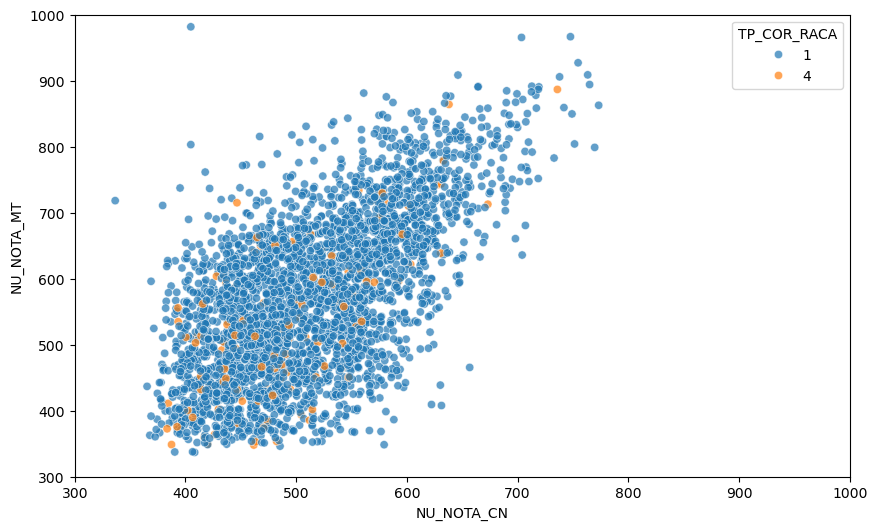

In [86]:
# sample = sample.loc[ (~sample['TP_COR_RACA'].isin([2,3])) & (sample['TP_ESCOLA'] == 2)].copy().reset_index()
sample_brancos = sample.loc[(~sample['TP_COR_RACA'].isin([2,3]))]
sample_brancos = sample_brancos.loc[(~sample['TP_COR_RACA'].isin([0,5]))]
colors = sample_brancos['TP_COR_RACA']
plt.figure(figsize=(10, 6))
plt.xlim(300, 1000)
plt.ylim(300, 1000)
sns.scatterplot(x=sample_brancos['NU_NOTA_CN'], y=sample_brancos['NU_NOTA_MT'], hue=colors, palette='tab10', alpha=0.7)

<Axes: xlabel='NU_NOTA_CN', ylabel='NU_NOTA_MT'>

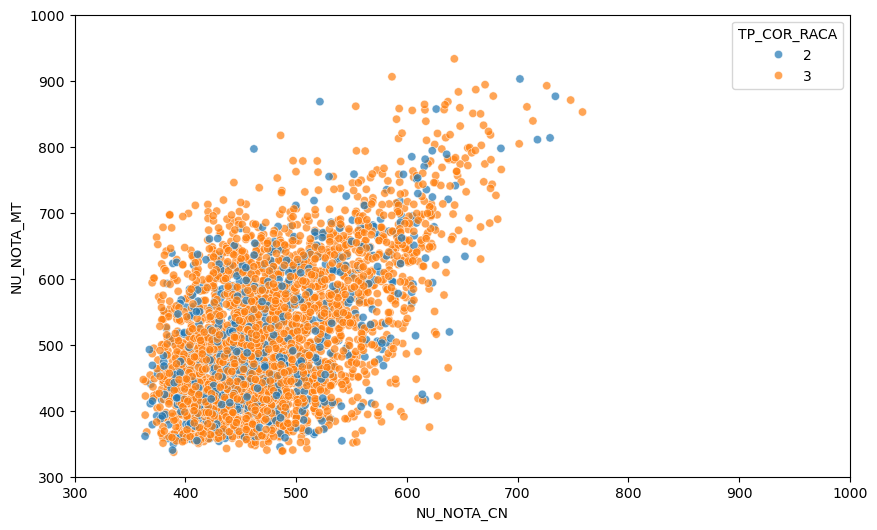

In [87]:
sample_pretos = sample.loc[(sample['TP_COR_RACA'].isin([2,3]))]
colors = sample_pretos['TP_COR_RACA']
plt.figure(figsize=(10, 6))
plt.xlim(300, 1000)
plt.ylim(300, 1000)
sns.scatterplot(x=sample_pretos['NU_NOTA_CN'], y=sample_pretos['NU_NOTA_MT'], hue=colors, palette='tab10', alpha=0.7)

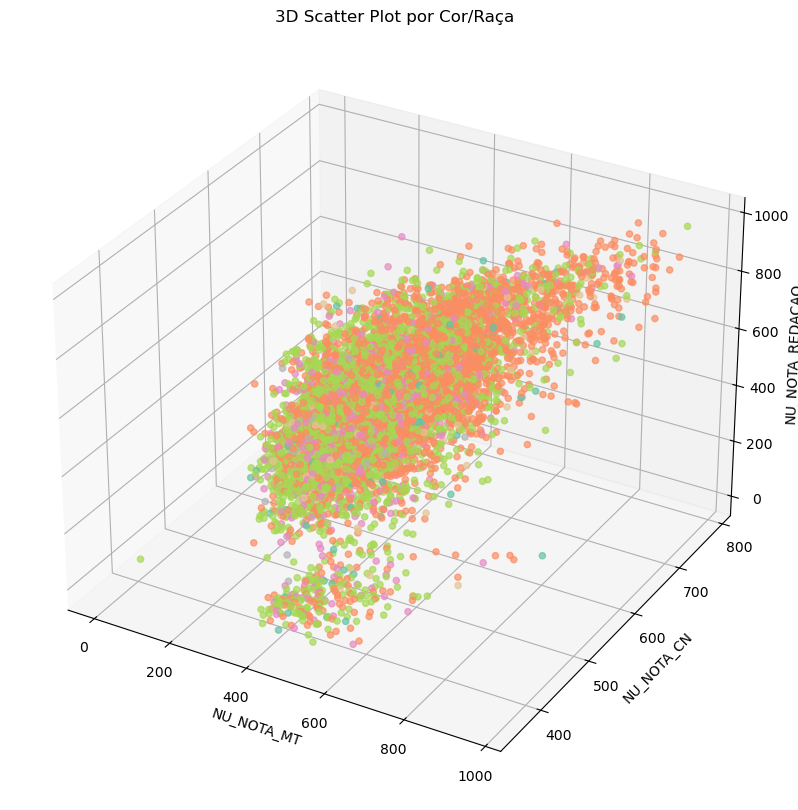

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

sample = df.sample(10000).copy()
# Example with your data
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Color categories (convert to numeric if needed)
colors = sample['TP_COR_RACA'].astype('category').cat.codes

# 3D scatter
ax.scatter(sample['NU_NOTA_MT'], sample['NU_NOTA_CN'], sample['NU_NOTA_REDACAO'],
           c=colors, cmap='Set2', alpha=0.7)

ax.set_xlabel('NU_NOTA_MT')
ax.set_ylabel('NU_NOTA_CN')
ax.set_zlabel('NU_NOTA_REDACAO')
ax.set_title('3D Scatter Plot por Cor/Raça')
plt.show()


In [89]:
sample

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2668663,210054734993,2022,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4320701,Sobradinho,43,RS,1,1,1,1,1088.000000,1058.000000,1067.000000,1077.000000,460.200000,489.800000,559.000000,664.000000,ADECCCCCEBEBCEDBADDBDBECBBCACAEAEBECABBEEAAEB,CBDEAEBEBEBACCEDDCAADBDCBEAABBDBEBDCBCBEBCDCB,CBBEDCADCDBDBACACAECCCEAAEDADBEBEACBBBCCDACCE,BEBCADECCDBDBAABDDADBDBBCEACDCEEDCCBABDCCEDAC,0,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.000000,100.000000,120.000000,120.000000,120.000000,180.000000,640.000000,D,F,D,B,4,H,A,C,D,B,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B
2777763,210057866835,2022,2,F,1,1,1,2,0,2,1.000000,0,3534609.000000,Osvaldo Cruz,35.000000,SP,2.000000,1.000000,1.000000,3534609,Osvaldo Cruz,35,SP,1,1,1,1,1087.000000,1056.000000,1066.000000,1078.000000,418.100000,508.600000,500.500000,581.600000,CBBDEBDBBCECABCCBCECDDBCDCCAAEDCDBDBBEEAEEBCB,EAABBABEACECCACDDEADACDBBCBDCDEDCCCACCEBAAAEC,BBBDDCDBCACADEAADECDDCEAAEEACDEADBBECEABDEDBE,BAEAABAEDCADECDCDECABCEDBDCBCCBACEDBDBBCCACDC,0,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.000000,120.000000,160.000000,120.000000,120.000000,60.000000,580.000000,H,H,C,C,3,D,A,B,C,B,B,B,A,B,B,B,A,B,B,A,A,D,B,A,B
560530,210056222592,2022,6,M,1,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501402,Belém,15,PA,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,425.100000,462.500000,396.700000,543.100000,DBCDBDCDAABACACBCCCDACEBCDCBDAACBBBBBABABAECC,BBBDECAACEADDCBCBCABCDEECBBBAABAEBBAAACCCEACD,BCBDEEBEAABACBDBCDADCBEACBEDBCABBADCBBDACCBAC,AAACEBBEECADABCBBDEDBDDBDCBCBCCBAABBDECDBDEBC,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,160.000000,200.000000,120.000000,160.000000,100.000000,740.000000,D,C,B,B,9,D,A,C,E,A,A,C,A,B,A,A,A,A,E,A,A,E,A,C,B
1525164,210057752245,2022,2,M,1,1,1,2,0,3,1.000000,0,3122306.000000,Divinópolis,31.000000,MG,4.000000,1.000000,1.000000,3122306,Divinópolis,31,MG,1,1,1,1,1088.000000,1058.000000,1067.000000,1077.000000,684.000000,724.200000,601.100000,798.900000,BBCCBECDDAADABABEBACCECDEBBDBEECDBEAEABCEAACD,CEDAAADBAECBEDDEDEABCBACAEEDAEBABBDDEAEDBEADD,CDBEBCEAEBAEDEDCCBEAECECCEBABEEAAAEBBDBADBCCC,CBBCDEEDCDBBBEABDDDBDEBDDDDDACDCBCEBCBDAAECAE,0,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.000000,160.000000,200.000000,160.000000,180.000000,200.000000,900.000000,G,F,E,E,5,L,A,C,D,B,A,B,A,B,A,A,A,B,C,B,B,E,B,C,B
997224,210055203019,2022,3,F,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928406,Santa Rita de Cássia,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,G,D,D,8,G,A,B,D,A,B,B,A,A,A,A,A,A,B,A,B,D,A,A,A
...,...,.

Criar uma aplicação de streamlit para visualizar e explorar os dados.
A aplicação deve
1. Ter acesso a todos os dados do Enem
2. Explorar todos os dados do Enem
    1. Classe social
    2. Cor da pele
    3. Escola pública 
    4. Range de nota
    5. Classificação dos pais
    6. Fazer MAPA da distribuição pelo país
    7. Número de acertos x notas -> Investigar essas questões
    8. Idade
    9. Renda per capta
    10. Cor da prova influência no resultado?
    11. Quem escolhe inglês tem notas maiores em outras matérias no geral?
    12. Quando terminou o ensino médio? Faz diferença isso na nota de preto e brancos? Pretos com notas altas terminaram o ensino médio a mais tempo e continuaram tentando?
3. Itens de prova
    1. Entender os parâmetros da TRI
    2. Posição do item na prova interfere no resultado?
    3. Quais habilidades são mais difíceis?
    4. Dá para tentar prever a nota?
    5. Todas as habilidades são igualmente cobradas nos diferentes anos de Enem?
    6. *Dá para calcular quanto cada questão valeu para cada aluno?*
4. Expandir tudo isso para todos os Enem'ss

## Investigando hipótese: A prova de espanhol tem um TRI melhor que a de inglês?

Isto é, supondo que dois candidatos, cada um em uma língua específica(inglês ou espanhol), acertem todas as questões de língua estrangeira e as mesmas questões no restante da prova de linguagem teriam a nota diferente? O que escolheu a prova de espanhol tem nota maior?

In [366]:
df = pd.read_csv('../DADOS/MICRODADOS_ENEM_2022.csv', encoding ='ISO-8859-1', sep = ';')

### Transformando as variáveis a serem investigadas

#### Tratando respostas marcadas

In [367]:
df['RESPOSTAS_LC_PURO'] = df['TX_RESPOSTAS_LC'].apply(
    lambda x: list(x) if pd.notnull(x) else []
)

df['RESPOSTAS_LC_ESTRANGEIRA'] = df['RESPOSTAS_LC_PURO'].apply(lambda x: x[:5])
df['RESPOSTAS_LC_PURO'] = df['RESPOSTAS_LC_PURO'].apply(lambda x: x[5:])

In [368]:
# df['TX_RESPOSTAS_LC_PURO']

In [369]:
# df['TX_RESPOSTAS_LC_ESTRANGEIRA']

In [370]:

# df['TX_RESPOSTAS_LC_PURO']

In [371]:
# df['TX_RESPOSTAS_LC_PURO_STR'] = df['TX_RESPOSTAS_LC_PURO'].apply(lambda x: ''.join(x))
# df['TX_RESPOSTAS_LC_PURO_STR']

In [372]:
# df['TX_RESPOSTAS_LC_ESTRANGEIRA_STR'] = df['TX_RESPOSTAS_LC_ESTRANGEIRA'].apply(lambda x: ''.join(x))
# df['TX_RESPOSTAS_LC_ESTRANGEIRA_STR']

In [373]:
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,RESPOSTAS_LC_PURO,RESPOSTAS_LC_ESTRANGEIRA
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,[],[]
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,[],[]
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.000000,1056.000000,1066.000000,1078.000000,421.100000,546.000000,498.800000,565.300000,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.000000,140.000000,200.000000,120.000000,140.000000,160.000000,760.000000,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,"[A, D, C, C, A, D, C, A, A, A, A, C, D, A, D, ...","[A, B, E, A, B]"
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.000000,1058.000000,1067.000000,1077.000000,490.700000,388.600000,357.800000,416.000000,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.000000,120.000000,40.000000,40.000000,100.000000,20.000000,320.000000,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,"[C, C, B, C, B, A, A, D, A, B, B, B, A, C, A, ...","[A, B, A, C, C]"
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,0,2,1.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3524709,Jaguariúna,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,E,B,B,4,F,A,D,E,C,A,B,B,B,B,B,A,B,B,B,A,E,A,A,B,[],[]
3476101,210057205644,2022,14,F,2,1,1,2,0,2,NaN,0,2604106.000000,Caruaru,26.000000,PE,2.000000,1.000000,1.000000,2604106,Caruaru,26,PE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Tratando gabaritos

In [375]:
df['GABARITO_LC'] = df['TX_GABARITO_LC'].apply(
    lambda x: list(x) if pd.notnull(x) else []
)

df['GABARITO_LC_INGLES'] = df['GABARITO_LC'].apply(lambda x: x[:5])
df['GABARITO_LC_ESPANHOL'] = df['GABARITO_LC'].apply(lambda x: x[5:10])
df['GABARITO_LC'] = df['GABARITO_LC'].apply(lambda x: x[10:])

In [376]:
string = 'asdfghjkl'

In [377]:
string[5:]

'hjkl'

Preciso criar uma lista com as questões especificas que cada candidato acertou.

### Comparando

Vamos pegar a prova azul para comparar. Vamos encontrar candidatos que tenham acertado todas as questões nas suas respectivas provas de língua estrangeira.

In [378]:
df_prova_azul = df.loc[df['CO_PROVA_LC'] == 1065]

In [379]:
df_prova_azul.sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,RESPOSTAS_LC_PURO,RESPOSTAS_LC_ESTRANGEIRA,GABARITO_LC,GABARITO_LC_INGLES,GABARITO_LC_ESPANHOL
1771738,210055662039,2022,2,F,1,1,1,2,0,2,1.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202305,Biguaçu,42,SC,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,492.900000,567.300000,547.200000,459.200000,ECCDCABBADECBCABDBDADCCDCBCDCDADBAEEAEBCEDEAD,BAABEDDAEBAEECAEDAABDECBAEDBBDCABECDBAECDCCCA,ECCAAEBEADACDDCACDCABAEECCBBAECABDACACAEBEEEA,BDDCDBCEDAACABCDCCBBADE*CDBABCCBDCCDBEAACCDBA,1,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,140.000000,200.000000,140.000000,160.000000,200.000000,840.000000,B,E,D,D,3,G,A,B,D,B,A,B,B,B,A,A,A,A,C,A,B,D,A,A,B,"[E, B, E, A, D, A, C, D, D, C, A, C, D, C, A, ...","[E, C, C, A, A]","[E, A, A, A, C, A, B, B, D, B, E, B, A, C, C, ...","[D, C, B, D, E]","[E, D, C, A, A]"
44219,210057939613,2022,5,M,3,1,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3138203,Lavras,31,MG,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,448.400000,533.500000,468.200000,410.000000,BBCDCBEDCEADCABBDBEBADCEAAEEAACEACDDCEAADBDBC,ADACADCACCBEDCAEDECBAEDAEAEEDBCACACBBBDDBEECE,DEBDEECEABADABEDDCABEAEEBEEBCEEEACACACAEBAADC,ACCCEBEEECEBDACDACDBECAEADBBBACEADDBBEEDAACDB,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,120.000000,120.000000,100.000000,120.000000,60.000000,520.000000,B,B,C,F,2,C,A,C,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,B,B,"[E, C, E, A, B, A, D, A, B, E, D, D, C, A, B, ...","[D, E, B, D, E]","[E, A, A, A, C, A, B, B, D, B, E, B, A, C, C, ...","[D, C, B, D, E]","[E, D, C, A, A]"
1261773,210056232397,2022,6,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5201405,Aparecida de Goiânia,52,GO,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,690.100000,693.000000,615.000000,633.400000,ECEDCECEACCCDABEDECCDCCACBEEABE.CCBDBEBDDBDEE,DEABCEDAEBAAECBECAABADDAAADBDEDAECADBBDDAB.CA,DDBDEECAACABEDBCBBCCDDEECCBBDCAAADACAEADBEAEB,CBBCEBECEDADCBCEABEDCDDAADCCBECDDBAADABBCCBAC,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,160.000000,200.000000,200.000000,200.000000,200.000000,960.000000,C,E,C,B,3,E,A,B,C,C,A,B,B,B,A,A,A,A,B,A,A,D,A,B,B,"[E, C, A, A, C, A, B, E, D, B, C, B, B, C, C, ...","[D, D, B, D, E]","[E, A, A, A, C, A, B, B, D, B, E, B, A, C, C, ...","[D, C, B, D, E]","[E, D, C, A, A]"
3449042,210056714600,2022,12,M,1,2,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,561.700000,479.400000,417.700000,601.800000,ECCCBEAADACCCBDDBAAABEAAEBCBCBAADDBBAABACACDA,DEEBEECBADBAEBDEBABBBDDBCEBBCBCBCBECBBDBDB.AE,CDDBDDACACADDCEADCDAEAECCCCBCCECBBECBBECDDABA,CDAABBCBDDADEEBAAAECBCDDBDCBBBADDAEADBCDDAEDD,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCB

In [388]:
df_prova_azul['TP_LINGUA'].value_counts()

TP_LINGUA
0    353483
1    259738
Name: count, dtype: int64

In [380]:
# 

# gabarito

In [381]:
gabarito = df_prova_azul['GABARITO_LC'][7]
def acertos(respostas, gabarito):
    acertos = []
    for i in range(len(respostas)):
        if respostas[i] == gabarito[i]:
            acertos.append(i+6)
    return acertos           

In [382]:
df_prova_azul['ACERTOS_LC_PURO'] = df_prova_azul['RESPOSTAS_LC_PURO'].map(lambda x: acertos(x, gabarito))

C:\Users\balad\AppData\Local\Temp\ipykernel_6716\1617670175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prova_azul['ACERTOS_LC_PURO'] = df_prova_azul['RESPOSTAS_LC_PURO'].map(lambda x: acertos(x, gabarito))


In [383]:
df_prova_azul['ACERTOS_LC_PURO']

7                     [7, 9, 12, 19, 22, 24, 27, 37, 38, 42]
11         [6, 7, 8, 9, 11, 18, 19, 25, 27, 31, 32, 33, 3...
17         [6, 9, 12, 14, 19, 21, 24, 25, 26, 27, 29, 32,...
20         [6, 9, 12, 14, 19, 23, 26, 31, 34, 36, 40, 41,...
25         [11, 18, 19, 23, 24, 28, 29, 33, 34, 36, 37, 4...
                                 ...                        
3476070    [8, 9, 10, 14, 17, 19, 20, 24, 25, 26, 27, 28,...
3476078    [7, 9, 11, 13, 14, 17, 19, 21, 22, 25, 26, 27,...
3476086    [6, 7, 9, 11, 12, 19, 21, 22, 23, 24, 25, 26, ...
3476088    [6, 9, 11, 14, 15, 22, 24, 26, 27, 34, 35, 37,...
3476098    [6, 7, 8, 9, 12, 13, 14, 17, 19, 24, 25, 26, 2...
Name: ACERTOS_LC_PURO, Length: 613221, dtype: object

In [384]:
# df_prova_azul['ACERTOS_LC_PURO'] = None 

# for index, row in df_prova_azul.iterrows():
#     acertos = []
#     for i in range(0, len(row['TX_RESPOSTAS_LC_PURO'])):
#         # print(gabarito[i])
#         # print(index)
#         if row['TX_RESPOSTAS_LC_PURO'][i] == gabarito[i]:
#             acertos.append(i)
    
#     # row['ACERTOS_LC_PURO'] = acertos
#     df_prova_azul.loc[index, 'ACERTOS_LC_PURO'] = acertos


# df_prova_azul['ACERTOS_LC_PURO']

In [385]:
# df_gabaritou_LE = df_prova_azul.loc[(df_prova_azul['RESPOSTAS_LC_ESTRANGEIRA'] == df_prova_azul['GABARITO_LC_INGLES']) |
#                                      (df_prova_azul['RESPOSTAS_LC_ESTRANGEIRA'] == df_prova_azul['GABARITO_LC_ESPANHOL'])]
# df_gabaritou_LE

In [386]:
# df_gabaritou_LE['NU_NOTA_LC'].min()

df_gabaritou_espanhol = df_prova_azul.loc[(df_prova_azul['RESPOSTAS_LC_ESTRANGEIRA'] == df_prova_azul['GABARITO_LC_ESPANHOL']) &
                                            (df_prova_azul['TP_LINGUA']==1)]
df_gabaritou_espanhol

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,RESPOSTAS_LC_PURO,RESPOSTAS_LC_ESTRANGEIRA,GABARITO_LC,GABARITO_LC_INGLES,GABARITO_LC_ESPANHOL,ACERTOS_LC_PURO
211,210055864562,2022,11,M,1,3,1,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,438.800000,508.200000,515.900000,553.700000,EACABBCACEBDCABEBCCDBEABBBDDCEAABCBACCEEBDDAB,CCACDDCBEEACECBEBAABDEEAAEEECBCDCAEAEBCAECDEB,EDCAACABAEAADBCAABADBECECCDCAAAABDACCDADBDEEA,CECAECAEEEECDBACABECBCDBAEBEBEBDDABCEABDBEADB,1,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,120.000000,120.000000,120.000000,100.000000,100.000000,560.000000,H,B,F,B,1,C,A,B,B,A,A,B,A,A,A,B,A,A,B,B,A,B,A,A,A,"[C, A, B, A, E, A, A, D, B, C, A, A, B, A, D, ...","[E, D, C, A, A]","[E, A, A, A, C, A, B, B, D, B, E, B, A, C, C, ...","[D, C, B, D, E]","[E, D, C, A, A]","[7, 9, 11, 21, 22, 24, 25, 26, 31, 32, 34, 36,..."
350,210055821524,2022,3,F,1,2,1,2,0,2,2.000000,0,3303203.000000,Nilópolis,33.000000,RJ,1.000000,1.000000,1.000000,3305109,São João de Meriti,33,RJ,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,604.100000,652.600000,619.500000,588.900000,DBCCBEBEACCCDCBECDEDAACAECEBEBABCBDBEECBEBDBC,AEABCEDABEADECBECBEBEDDBAADBAECADACDEBEDBBDCA,EDCAABBAACAEBCBCBACCBEEECEBADAAAADABADEDDDAEE,ACDABCDBEBBCDEECDDDCDCDCCDDABDADCACACBCDAAADA,1,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,140.000000,180.000000,120.000000,160.000000,200.000000,800.000000,G,G,D,D,4,L,A,C,D,B,B,B,B,B,A,B,A,B,C,B,B,E,B,C,B,"[B, B, A, A, C, A, E, B, C, B, C, B, A, C, C, ...","[E, D, C, A, A]","[E, A, A, A, C, A, B, B, D, B, E, B, A, C, C, ...","[D, C, B, D, E]","[E, D, C, A, A]","[8, 9, 10, 11, 13, 15, 17, 18, 19, 20, 21, 22,..."
528,210055605727,2022,3,F,1,2,1,2,0,2,1.000000,0,3112109.000000,Caparaó,31.000000,MG,2.000000,1.000000,1.000000,3113305,Carangola,31,MG,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,524.000000,426.000000,508.500000,546.100000,AADACEBEBAEDCABEADECBCCECDBADCCABCDAECEBDAAEC,ACACCDABDDBDCEEBDBBCBEDABAAEACDBBCEADECDBBCCD,EDCAACBAAEEBADEBCCBBCAEECCBDAEEADDBCDDDEBAAAC,DADCEBDEECACBD.ECECAEDADBBCCABAADBDEABAECBAEC,1,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,120.000000,40.000000,40.000000,120.000000,40.000000,360.000000,A,E,A,B,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,"[C, B, A, A, E, E, B, A, D, E, B, C, C, B, B, ...","[E, D, C, A, A]","[E, A, A, A, C, A, B, B, D, B, E, B, A, C, C, ...","[D, C, B, D, E]","[E, D, C, A, A]","[8, 9, 12, 14, 23, 24, 25, 26, 27, 32, 34, 36,..."
1044,210057768424,2022,11,F,1,3,1,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2515302,Sapé,25,PB,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,645.900000,717.100000,655.300000,711.700000,EBCACDCEDECCDDCCCDECCCCAABABABEADBBCDEBDDBBEC,DE

In [387]:
df_gabaritou_ingles = df_prova_azul.loc[(df_prova_azul['RESPOSTAS_LC_ESTRANGEIRA'] == df_prova_azul['GABARITO_LC_INGLES']) &
                                            (df_prova_azul['TP_LINGUA']==0)]
df_gabaritou_ingles


# df_gabaritou_LE_ingles = df_gabaritou_LE.loc[df_gabaritou_LE['TP_LINGUA'] == 1 ]
# df_gabaritou_LE_ingles

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,RESPOSTAS_LC_PURO,RESPOSTAS_LC_ESTRANGEIRA,GABARITO_LC,GABARITO_LC_INGLES,GABARITO_LC_ESPANHOL,ACERTOS_LC_PURO
27,210057728624,2022,7,M,1,2,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930501,Serrinha,29,BA,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,414.600000,518.200000,596.500000,573.400000,EBCDAACABEABDCABDAECBADACDBAEDCEBBDEAEDAAEBDD,DCACEECAEBADECAACBBBBADCECDEACCADBBEBDABBEDCA,DCBDEEAEAAACCDBCBECDEEEECCBBDCEAEEBCADADBAEDE,AACCECBEEDDCDEBDADCCBEEBDCABBDABDCCEAEDBAEBCD,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,120.000000,160.000000,120.000000,120.000000,120.000000,640.000000,E,E,D,B,3,B,A,C,C,B,A,B,B,B,A,B,A,A,B,B,A,D,A,B,B,"[E, A, E, A, A, A, C, C, D, B, C, B, E, C, D, ...","[D, C, B, D, E]","[E, A, A, A, C, A, B, B, D, B, E, B, A, C, C, ...","[D, C, B, D, E]","[E, D, C, A, A]","[6, 7, 9, 11, 14, 15, 17, 19, 22, 23, 24, 25, ..."
55,210056012033,2022,3,F,1,1,1,2,0,2,1.000000,0,3550308.000000,São Paulo,35.000000,SP,4.000000,1.000000,1.000000,3515004,Embu das Artes,35,SP,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,819.500000,684.900000,657.800000,905.500000,EAEDCECEACCCDABCCECBBCCAEBEDABEADBAEBCBDDABEB,DEABEEDAEDAEECBECBCCCDDAAADBCECAEABDEBDDBBBCA,DCBDEEABACABBDBCBACCDAEECCBDECAAADCBACEDDEADE,DBAAACEBEDAECCBEDDDEDBDCBDBCBEEBDDCCDBCECBAAC,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,160.000000,200.000000,160.000000,180.000000,200.000000,900.000000,D,F,B,D,4,E,A,B,C,B,A,B,B,B,A,A,A,A,B,A,A,E,A,B,B,"[E, A, B, A, C, A, B, B, D, B, C, B, A, C, C, ...","[D, C, B, D, E]","[E, A, A, A, C, A, B, B, D, B, E, B, A, C, C, ...","[D, C, B, D, E]","[E, D, C, A, A]","[6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, ..."
92,210057005323,2022,3,M,1,2,1,2,0,2,1.000000,0,3550308.000000,São Paulo,35.000000,SP,2.000000,1.000000,1.000000,3550308,São Paulo,35,SP,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,545.100000,636.200000,623.100000,637.900000,EDD..ECABCBCDACBCCDDCEAEABEBAECEECBBEBCEDBCBC,DEABEEDEDDADECBECAEBCDDAAADCAEDAAACABEDDBBACE,DCBDEEAEACCBBDBEBDCCDEAECEBADEAEEDACAAAEBDCEE,ACCADCEBBCACBCADCBEBBEDBBAACBBAADBBABEBECEDBB,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.000000,120.000000,180.000000,140.000000,140.000000,120.000000,700.000000,B,G,C,B,5,E,A,C,C,B,B,B,A,B,A,B,A,A,C,A,A,C,B,B,B,"[E, A, E, A, C, C, B, B, D, B, E, B, D, C, C, ...","[D, C, B, D, E]","[E, A, A, A, C, A, B, B, D, B, E, B, A, C, C, ...","[D, C, B, D, E]","[E, D, C, A, A]","[6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, ..."
138,210056149883,2022,8,F,1,1,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2304400,Fortaleza,23,CE,1,1,1,1,1086.000000,1055.000000,1065.000000,1076.000000,637.800000,631.000000,598.500000,807.700000,EAEDAABAABCCDAAABDAAACCAABEDADBABEBABEBADAABC,AEA

In [408]:
86347*15482

1336824254

In [392]:
# c = 0

# for acertos in df_gabaritou_ingles['ACERTOS_LC_PURO']:
#     print(acertos)
#     if c == 5:
#         break
#     c+=1
    

[6, 7, 9, 11, 14, 15, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 36, 37, 40, 41, 43, 45]
[6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 37, 39, 40, 45]
[6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 22, 24, 25, 27, 29, 31, 34, 36, 37, 41, 42, 45]
[6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 22, 24, 25, 26, 27, 28, 30, 32, 34, 44]
[9, 11, 12, 13, 14, 15, 17, 19, 20, 24, 25, 26, 27, 29, 31, 34, 37, 38, 41, 42, 43, 44, 45]
[6, 7, 8, 9, 12, 14, 17, 19, 20, 22, 24, 25, 26, 27, 29, 31, 32, 34, 37, 41, 45]


In [398]:
# df_gabaritou_ingles['ACERTOS_LC_PURO']

27         [6, 7, 9, 11, 14, 15, 17, 19, 22, 23, 24, 25, ...
55         [6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, ...
92         [6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, ...
138        [6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, ...
143        [9, 11, 12, 13, 14, 15, 17, 19, 20, 24, 25, 26...
                                 ...                        
3475882    [6, 7, 9, 10, 11, 12, 14, 15, 17, 19, 20, 21, ...
3475893    [6, 7, 9, 10, 11, 12, 13, 17, 19, 20, 21, 22, ...
3475949    [8, 9, 10, 11, 13, 14, 15, 16, 19, 20, 21, 22,...
3476030    [6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, ...
3476078    [7, 9, 11, 13, 14, 17, 19, 21, 22, 25, 26, 27,...
Name: ACERTOS_LC_PURO, Length: 86347, dtype: object

In [420]:
len(procurado)

28

In [ ]:
def hash(lista):
     hash

In [429]:
lista = []

lista[40000] = 30

IndexError: list assignment index out of range

In [431]:
array = np.array([])

In [432]:
array[20]= 30

IndexError: index 20 is out of bounds for axis 0 with size 0

In [425]:
# iguais = []

# for index, row in df_gabaritou_ingles.iterrows():
#     for index2, row2 in df_gabaritou_espanhol.iterrows():
#         if row['ACERTOS_LC_PURO'] == row2['ACERTOS_LC_PURO']:
#             iguais.append([row['NU_INSCRICAO'], row2['NU_INSCRICAO']])

In [433]:
df_gabaritou_ingles['ACERTOS_LC_PURO']

27         [6, 7, 9, 11, 14, 15, 17, 19, 22, 23, 24, 25, ...
55         [6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, ...
92         [6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, ...
138        [6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, ...
143        [9, 11, 12, 13, 14, 15, 17, 19, 20, 24, 25, 26...
                                 ...                        
3475882    [6, 7, 9, 10, 11, 12, 14, 15, 17, 19, 20, 21, ...
3475893    [6, 7, 9, 10, 11, 12, 13, 17, 19, 20, 21, 22, ...
3475949    [8, 9, 10, 11, 13, 14, 15, 16, 19, 20, 21, 22,...
3476030    [6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, ...
3476078    [7, 9, 11, 13, 14, 17, 19, 21, 22, 25, 26, 27,...
Name: ACERTOS_LC_PURO, Length: 86347, dtype: object

In [428]:
iguais

[[210057874812, 210054626019], [210054966602, 210055663864]]

Olá

In [406]:
df_prova_azul.loc[df_prova_azul['NU_INSCRICAO'] == 210057874812]['NU_NOTA_LC']

595077   643.000000
Name: NU_NOTA_LC, dtype: float64

In [407]:
df_prova_azul.loc[df_prova_azul['NU_INSCRICAO'] == 210054626019]['NU_NOTA_LC']

806851   642.700000
Name: NU_NOTA_LC, dtype: float64

In [414]:
list(df_prova_azul.loc[df_prova_azul['NU_INSCRICAO'] == 210057874812]['ACERTOS_LC_PURO']) == list(df_prova_azul.loc[df_prova_azul['NU_INSCRICAO'] == 210054626019]['ACERTOS_LC_PURO'])

True

--------------------------------------------------------------------------------------------

In [411]:
df_prova_azul.loc[df_prova_azul['NU_INSCRICAO'] == 210054966602]['NU_NOTA_LC']

761195   665.000000
Name: NU_NOTA_LC, dtype: float64

In [412]:
df_prova_azul.loc[df_prova_azul['NU_INSCRICAO'] == 210055663864]['NU_NOTA_LC']

678872   666.000000
Name: NU_NOTA_LC, dtype: float64